<a href="https://colab.research.google.com/github/rochinha23/Curso-Data-Science-e-Machine-Learning-com-Estatistica-e-Python/blob/main/Visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import io

In [4]:
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo',
                'Idade', 'IrmaosConjuge','PaisFilhos', 'Bilhete', 'Tarifa', 
                'Cabine', 'Embarque']

In [7]:
data.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
data['Sexo'].replace({'male': 'homem', 'female': 'mulher'},inplace=True)

In [9]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan )

In [10]:
data['Cabine']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabine, Length: 891, dtype: object

**Matplotlib** biblioteca principal para visualização de dados

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline #as imagens que formos utilizando/exec serão no proprio notebook 

UsageError: unrecognized arguments: #as imagens que formos utilizando/exec serão no proprio notebook


In [12]:
data['Idade'].isnull().sum()

177

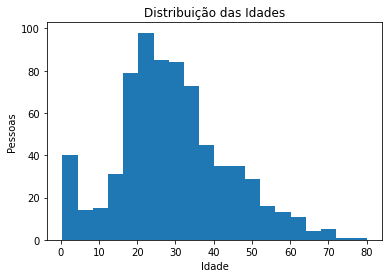

In [13]:
plt.hist(data['Idade'].dropna(), bins=20) #histograma das idades, bins = qtt de barras,para tirar os valores nulos
plt.title('Distribuição das Idades') #coloca o titulo no grafico
plt.ylabel('Pessoas') #descrição eixo y
plt.xlabel('Idade') #descrição eixo x
plt.show() #mostra o grafico apenas, sem o array

In [14]:
data['Classe'].unique()

array([3, 1, 2])

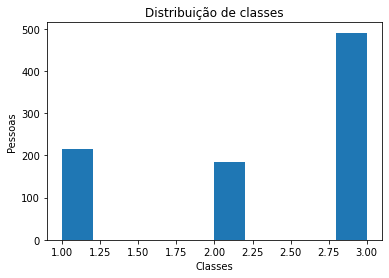

In [15]:
plt.hist(data['Classe'])
plt.title('Distribuição de classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')
plt.show()

**SUBPLOTS - 1ª FORMA**

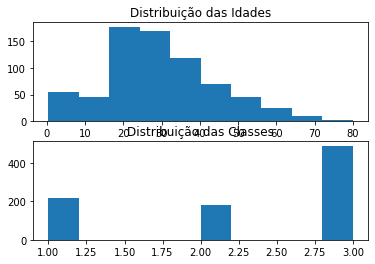

In [16]:
plt.subplot(2,1,1) #2 linha, 1 colunas, plot 1
plt.hist(data['Idade'].dropna())
plt.title('Distribuição das Idades')

plt.subplot(2,1,2) # 2 linha, 1 colunas, plot 2
plt.hist(data['Classe'].dropna())
plt.title('Distribuição das Classes')


plt.show()

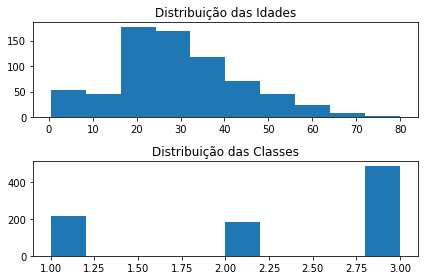

In [17]:
plt.subplot(2,1,1) #2 linha, 1 colunas, plot 1
plt.hist(data['Idade'].dropna())
plt.title('Distribuição das Idades')

plt.subplot(2,1,2) #2 linha, 1 colunas, plot 2
plt.hist(data['Classe'].dropna())
plt.title('Distribuição das Classes')

plt.tight_layout() #não deixa junto as informações do grafico
plt.show()

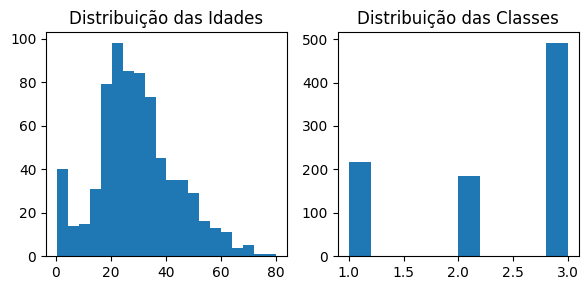

In [18]:
plt.figure(figsize=(6,3),dpi=100)
plt.subplot(1,2,1) #1 linha, 2 colunas, plot 1
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das Idades')

plt.subplot(1,2,2) #1 linha, 2 colunas, plot 2
plt.hist(data['Classe'].dropna())
plt.title('Distribuição das Classes')

plt.tight_layout() #não deixa junto as informações do grafico
plt.show()

**SUBPLOTS - 2ª FORMA**

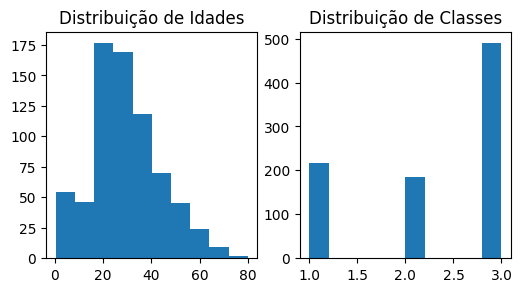

In [19]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi=100) #f=figuras,ax=eixos, 1 linha, 2 colunas,figsize=tamanho da figura,dpi=melhorar a qualidade da imagem
ax[0].hist(data['Idade'].dropna()) #ax é um array então da para selecionar os graficos pelos indices
ax[0].set_title('Distribuição de Idades')
ax[1].hist(data['Classe'])
ax[1].set_title('Distribuição de Classes')

plt.show()

**Seaborn** outra biblioteca de visualização, só que toda baseada na Matplotlib,conseguimos misturar os dois
A ideia do Seaborn é fazer a gente diminuir o que temos que digitar para obter um grafico bonito, uma boa apresentação

In [20]:
import seaborn as sns

In [21]:
data['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [22]:
data['Sexo'].value_counts()

homem     577
mulher    314
Name: Sexo, dtype: int64

In [23]:
data['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

**pie e countplot**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


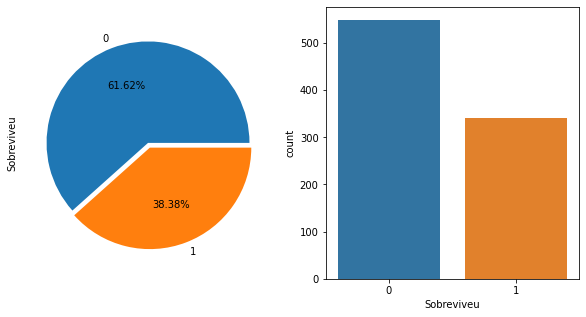

In [24]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(ax=ax[0], explode=[0,0.05], autopct='%0.2f%%')

sns.countplot('Sobreviveu', data=data, ax=ax[1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '')

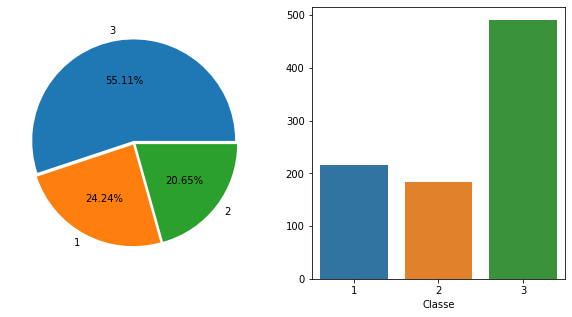

In [25]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Classe'].value_counts().plot.pie(ax=ax[0], explode=[0.02,0.02,0.02], autopct='%0.2f%%')
ax[0].set_ylabel('') 

sns.countplot('Classe', data=data, ax=ax[1])
ax[1].set_ylabel('')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


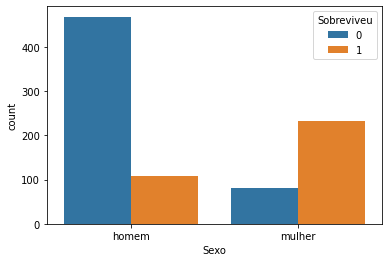

In [26]:
sns.countplot('Sexo', hue='Sobreviveu',data=data)

**boxplot**

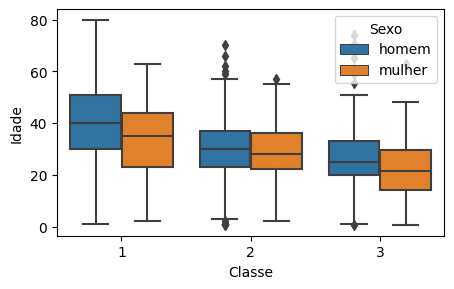

In [27]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe',y='Idade',hue='Sexo',data=data)

**violinplot**

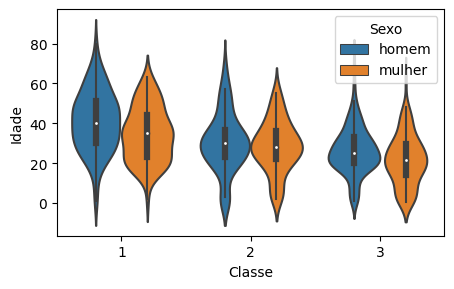

In [28]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='Classe', y='Idade', hue='Sexo', data=data)

**FacetGrid com hist** ajuda a criar multiplos graficos com maior facilidade

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


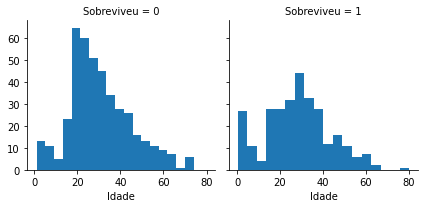

In [29]:
g = sns.FacetGrid(data, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

**FacetGrid com barplot**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


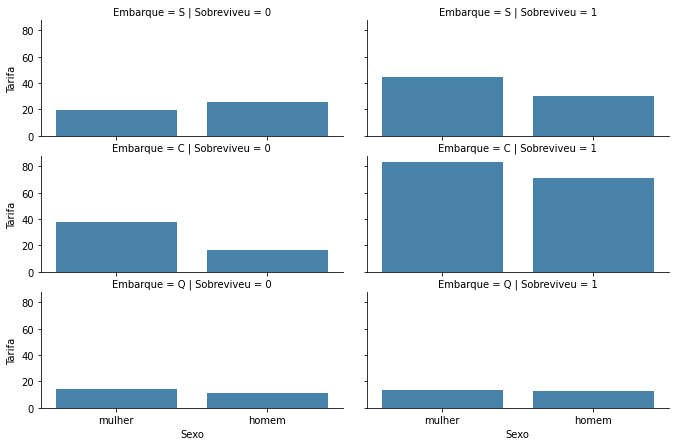

In [30]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')
g.map(sns.barplot, 'Sexo', 'Tarifa',alpha=0.9, ci=None) #alpha deixa o grafico transparente, quanto menor o alpha mais transparente, ci=intervalo de confiança

fig=plt.gcf()
fig.set_size_inches(10,6)